# Optimisation discrète et optimisation multi-objectif

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [2]:
mpl.rcParams['figure.figsize'] = (12, 6)

In [3]:
def plot_assignments(X,Boites,Objets):
    N=Boites.shape[0]
    plt.scatter(Boites[:,0],Boites[:,1], c="b", marker='s', s=100, label="Boites")
    plt.scatter(Objets[:,0],Objets[:,1], c="r", marker='o', label="Objets")
    for i, txt in enumerate(list(range(1,N+1))):
        plt.annotate(txt,(Objets[:,0][i]+0.02,Objets[:,1][i]+0.02))
    for idx,assin_optim in enumerate(X.argmax(axis=1)):
        plt.plot([Objets[assin_optim][0],Boites[idx][0]],[Objets[assin_optim][1],Boites[idx][1]], "r")
    plt.legend()
    plt.show()

## Rangement d'objets (Optimisation combinatoire)

On souhaite ranger N objets éparpillés sur le sol dans N boîtes alignées sur le sol.

Les boîtes sont alignées selon l’axe des x et sont ordonnées de gauche à droite (si i < i′,
la boîte i est à gauche de la boîte i′). La boîte i est centrée sur un point $B_i$ du plan (x, y).
De même l’objet n°j est repéré par le point $O_j$ du plan (x, y).

Les objets doivent être rangés de manière à :
- N’avoir qu’un seul objet par boîte,
- Ce que tous les objets soient rangés,
- Minimiser la distance totale de déplacement. Elle se calcule en sommant les distances nécessaires pour ranger chaque objet. On considère que pour ranger l’objet n°j dans la boîte n°i, la distance nécessaire est $\lVert O_j − B_i \rVert$ (distance euclidienne).

In [4]:
Boites=np.genfromtxt("RangerObjets/PositionCasiers.txt",skip_header=1)
Objets=np.genfromtxt("RangerObjets/PositionObjets.txt",skip_header=1)

N=Boites.shape[0]

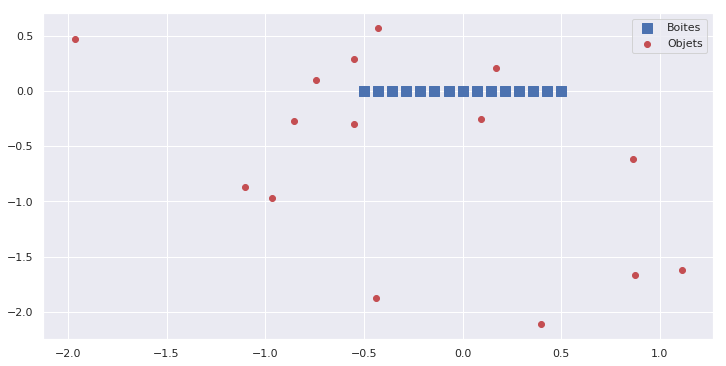

In [5]:
plt.scatter(Boites[:,0],Boites[:,1], c="b", marker='s', s=100, label="Boites")
plt.scatter(Objets[:,0],Objets[:,1], c="r", marker='o', label="Objets")
plt.legend()
plt.show()

On représente une solution du problème par un vecteur à valeurs binaires : soit $x \in R^{n^2x1}$ tel que $x_{i,j} = 1$ si l’objet j est dans la boîte i, 0 sinon. L’objectif de l’exercice est de
formuler le problème d’optimisation à résoudre comme un problème de programmation
linéaire en nombres entiers, puis de le résoudre.

### Formulation du problème

1) Traduction mathématique : La boîte i contient un objet et un seul et que l'objet j se trouve dans une boîte et une seule

$$\sum_{i=1}^{N}x_{i,j}=1 \quad et \quad \sum_{j=1}^{N}x_{i,j}=1$$

2) Formulation du problème de programation linéaire en nombres entiers

$$ min \sum_{i,j=1}^{N}x_{i,j} \lVert O_j − B_i \rVert$$
$$\forall i, j \in \{1,..,N\} \quad x_{i,j} \in \{0,1\}$$
$$\sum_{i=1}^{N}x_{i,j}=1$$
$$\sum_{j=1}^{N}x_{i,j}=1$$

### Résolution du problème

##### Question 2)

Optimization status : optimal
Cost optimized value : 15.377627810052134
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


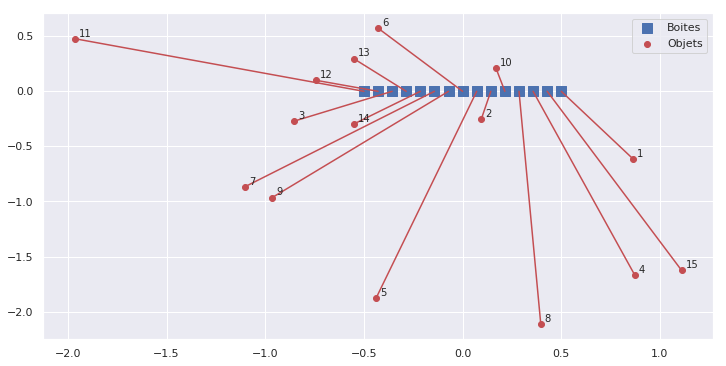

In [6]:
import cvxpy as cvx
import numpy as np
from scipy.spatial import distance

# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

# Our cost is the sum of the assignments * distances
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

Q2 15.37
Q3 15.5651
Q4 15.9014
Q5  15.9048

##### Question 3)

Nouvelle contrainte : l'objet n°1 doit se situer dans la boîte située juste à gauche de la boîte contenant l'objet n°2

Optimization status : optimal
Cost optimized value : 15.565123298218957
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


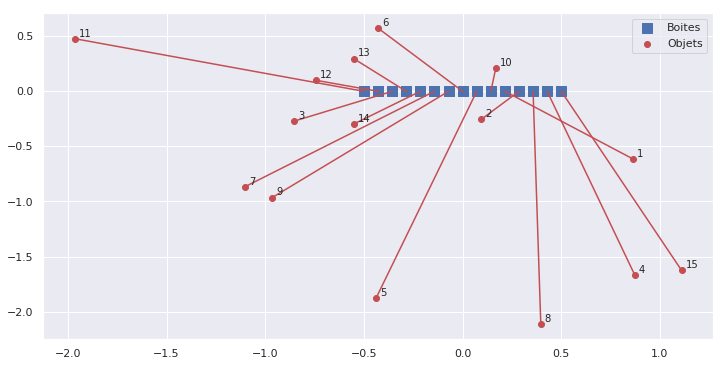

In [7]:
import cvxpy as cvx
import numpy as np
from scipy.spatial import distance

# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]
for i in range(N-1):
    constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]

# Our cost is the sum of the assignments * distances
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

##### Question 4)

Nouvelle contrainte : La boîte contenant l'objet n°3 se situe à droite de la boîte contenant l'objet n°4 (sans être forcément à côté)

Cette contrainte se traduit par :
$$x_{i,3} + x_{i+k,4} \le 1 \quad \forall i,k \gt 0$$
En effet

Optimization status : optimal_inaccurate
Cost optimized value : 15.956916188033052
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


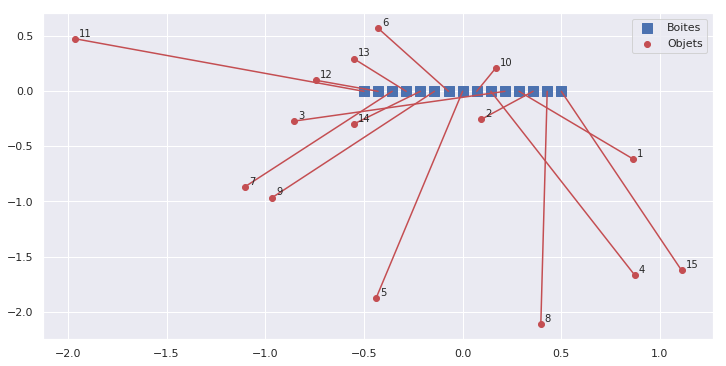

In [11]:
import cvxpy as cvx
import numpy as np
from scipy.spatial import distance

# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

for i in range(N-1):
    constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]
    
for i in range(N):
    for k in range(1,N-i):
        constraints += [Assignments[i*N+2] + Assignments[(i+k)*N+3] <= 1]

# Our cost is the sum of the assignments * distances
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

##### Question 5)

Nouvelle contrainte : La boîte contenant l'objet n°7 se situe à côté l'objet n°9

Cette contrainte se traduit par :
$$x_{i,7} + x_{i+k,9} \le 1 \quad \forall i,k \gt 0$$
$$x_{i,7} + x_{i-k,9} \le 1 \quad \forall i,k \gt 0$$
En effet

Optimization status : optimal_inaccurate
Cost optimized value : 15.931067208885041
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


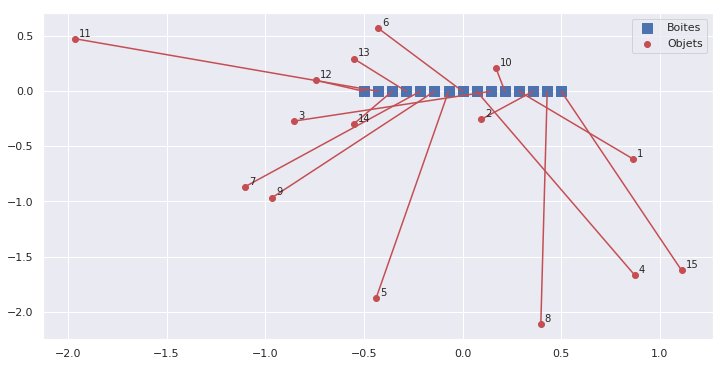

In [9]:
import cvxpy as cvx
import numpy as np
from scipy.spatial import distance

# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

for i in range(N-1):
    constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]

for i in range(N):
    for k in range(1,N-i):
        constraints += [Assignments[i*N+2] + Assignments[(i+k)*N+3] <= 1]
    for l in range(2,N-i):
        constraints += [Assignments[i*N+6] + Assignments[(i+l)*N+8] <= 1]
    for p in range(2,i+1):
        constraints += [Assignments[i*N+6] + Assignments[(i-p)*N+8] <= 1]

# Our cost is the sum of the assignments * distances
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

## Communication entre espions (optimisation combinatoire)

##### Question 5)

### Formulation du problème

On représente une solution du problème par un vecteur à valeurs binaires : soit $x \in R^{n^2x1}$ tel que $x_{i,j} = 1$ si le message est transmis de l'agent i à l'agent j, 0 sinon.

Il s'agit de trouver la façon de communiquer le message à tous les agents à partir de l'agent $1$ qui minimise la probabilité totale d'interception lors des différentes transmissions.

Le problème est soumis à plusieurs contraintes :

- L'agent n°1 ne reçoit pas de message : $\sum_{i=1}^{N}x_{i,1} = 0$
- Un agent ne peut pas envoyer de message à lui-même : $\sum_{i=1}^{N}x_{i,i} = 0$
- Un agent reçoit le message qu'une seule fois : $\forall j \quad \sum_{i=1}^{N}x_{i,j} = 1$
- Un agent ne peut pas envoyer de message tant qu'il n'en a pas reçu : $ \forall i \quad \lVert x_{i,j} \rVert_\infty \le \lVert x_{j,i} \rVert_\infty$

Le problème peut être finalement formulé de la façon suivante :

$$ min \sum_{i,j=1}^{N}x_{i,j} P_{i,j}$$
$$\forall i, j \in \{1,..,N\} \quad x_{i,j} \in \{0,1\}$$
$$\sum_{i=1}^{N}x_{i,1} = 0$$
$$\sum_{i=1}^{N}x_{i,i} = 0$$
$$\forall j \quad \sum_{i=1}^{N}x_{i,j} = 1$$
$$ \forall i \quad \lVert x_{i,j} \rVert_\infty \le \lVert x_{j,i} \rVert_\infty$$

### Résolution du problème

In [117]:
Probas=np.nan_to_num(np.genfromtxt("ProbaInterception.txt"))

N=Probas.shape[0]

Probas=Probas.flatten()

In [184]:
import cvxpy as cvx
import numpy as np

Probas=np.nan_to_num(np.genfromtxt("ProbaInterception.txt"))

N=Probas.shape[0]

Probas=Probas.flatten()

# The variable we are solving for
Transmissions = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]

for i in range(1,N):    
    constraints += [cvx.sum(Transmissions[[j*N+i for j in range(N)]]) == 1]
    constraints += [Transmissions[N*i+i] == 0]

#for i in range(N):
#    constraints += [cvx.atoms.max(Transmissions[N*i:N*(i+1)]) <= cvx.atoms.max(Transmissions[[j*N+i for j in range(N)]])]

constraints += [cvx.sum(Transmissions[[j*N for j in range(N)]]) == 0]

# Our cost is the sum of the assignments * distances
Cost = cvx.sum(Transmissions * Probas)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost
Spies_problem = cvx.Problem(obj, constraints)

# Solving the problem
Spies_problem.solve()

#Results
#X=np.round(np.abs(Transmissions.value.reshape(N,N)))
print("Optimization status :",Spies_problem.status)
print("Cost optimized value :",Spies_problem.value,"\n")
print(X)

Optimization status : optimal
Cost optimized value : -3.3413540560349773e-12 

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Résultats du problème

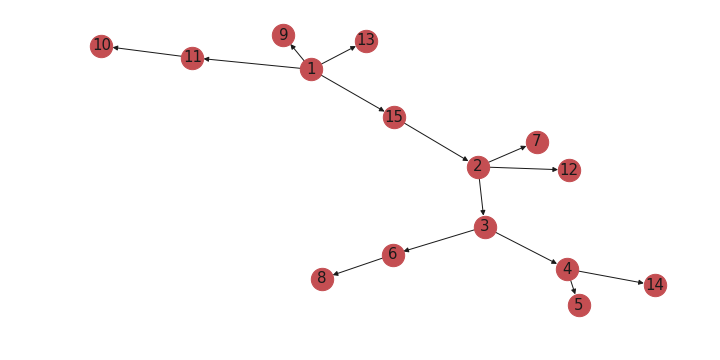

In [173]:
import warnings
import networkx as nx
warnings.filterwarnings('ignore')
G=nx.from_numpy_matrix(X, create_using=nx.MultiDiGraph())
pos = nx.layout.spring_layout(nx.from_numpy_matrix(X))
nx.draw_networkx_labels(G, pos, {i : i + 1 for i in G.nodes()}, font_size=15)
nx.draw(G, pos, node_size=500)

##### Probabilité d'interception

In [189]:
print("La probabilité d'interception du message est :",np.sum(X*Probas.reshape(N,N)))

La probabilité d'interception du message est : 0.0


## Dimensionnement d'une poutre (optimisation multiobjectif)